### 2021 Spring "EE479: Scientific Computing & Data"

#### Tae Hyung Kim, Yumin Song (KAIST EE Yong-Hoon Kim Group) 
#### Kutz 2.2 Iterative Solution Methods for Ax=b

#### 2021. 05. 01 Revised from matlab version                                                           

### Jacobi's method

Consider the linear system

$$ 7x_{1} - x_{2} = 5 $$
$$ 3x_{1} - 5x_{2} = -7 $$

Jacobi's method begins with solving the first equation for $x_{1}$ and the second equation for $x_{2}$, to obtain

Equation (1):
$$ x_{1} = \frac{5+x_{2}}{7}$$
$$ x_{2} = \frac{7+3x_{1}}{5}$$

Step1. We now need an initial approximation to the solution, where $x_{1}=0$, $x_{2}=0$<br>

Step2. Substitute initial values (guess) into eqation (1), we get new values of $x_{1}=0.714$ and $x_{2}=1.4$<br>

Step3. Then, substitute theses values again into equation (1) to get next step $x_{1}$ and $x_{2}$ until it converges.

Schematics for Jabobi's method (succesive iterates in a linear system according to the crissross pattern)
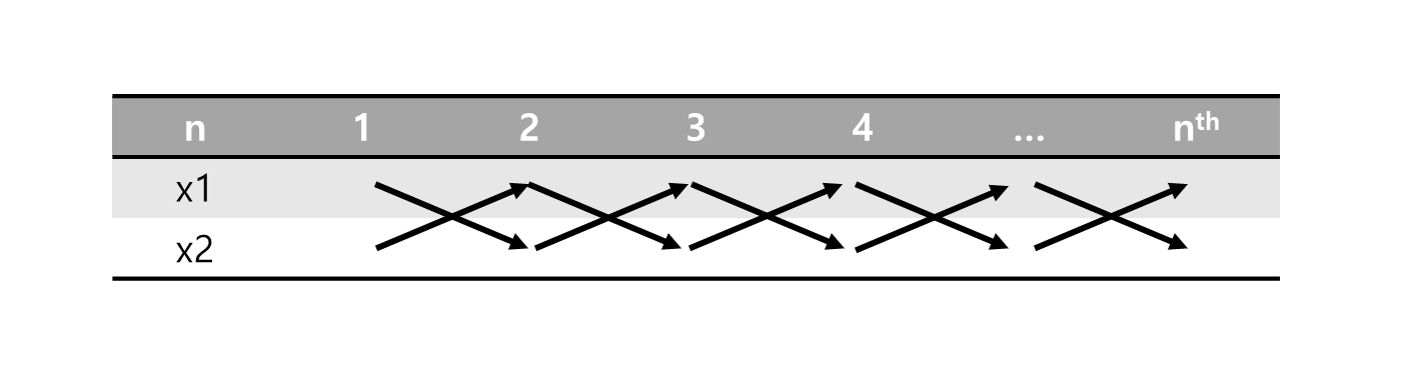

### Examples

$$ 4x - y + z = 7 $$
$$ 4x -8y + z = -21 $$
$$ -2x + y + 5z = 15 $$

Then, we can rewrite each equation as follows
 
$$ x = \frac{7+y-z}{4} $$
$$ y = \frac{21+4x+z}{8} $$
$$ z = \frac{15+2x-y}{5} $$

To solve the system iteratively, we can define the following Jacobi iteration scheme based on the above equations.

$$ x_{k+1} = \frac{7+y_{k}+z_{k}}{4} $$
$$ y_{k+1} = \frac{21+4x_{k}+z_{k}}{8} $$
$$ z_{k+1} = \frac{15+2x_{k}-y_{k}}{5} $$

Algorithm:

1 Guess initial values: $(x_{0}, y_{0}, z_{0})$.

2 Iterate the Jacobi scheme: $x_{k+1} = D^{−1}((D − A)x_{k} + b)$, where $A=L+D+U$

3 Check for convergence: $ \vert x_{k+1} − x_{k} \vert $ < tolerance.


In [9]:
import numpy as np 
from numpy import array, zeros, diag, diagflat, dot
from numpy.linalg import inv

def jacobi(A,b,N=25,x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed 
    if x is None:
        x = zeros(len(A[0]))
    print('initial=',x[0],x[1],x[2])
    # Create a vector of the diagonal elements of A  and subtract them from A                                                                                                                                           
    D = diag(A)
    R = A - diagflat(D)
    print('\nIteration\tx\ty\tz\n')
    # Iterate for N times                                                                                                                                                                          
    for i in range(N):        
        x_k =  (b - dot(R,x)) / D
        if np.sqrt(sum(np.square(abs(x_k - x)))) < 2 * 10**(-9):
            x = x_k
            print('%d\t %0.9f  %0.9f %0.9f ' %(i+1,x[0],x[1],x[2]))
            break
        else :
            x = x_k
            print('%d\t %0.9f  %0.9f %0.9f ' %(i+1,x[0],x[1],x[2]))
        if i+1 == N :
            print('Can not find root')
    return x
# Initial guess 
guess = array([1.0,2.0,2.0])
### Convergence input 
A = array([[4.0,-1.0,1.0],[4.0,-8.0,1.0],[-2.0,1.0,5.0]])
b = array([7.0,-21.0,15.0])

sol = jacobi(A,b,N=25,x=guess) # N means maximum number of iteration 
print("final root x:",sol)

initial= 1.0 2.0 2.0

Iteration	x	y	z

1	 1.750000000  3.375000000 3.000000000 
2	 1.843750000  3.875000000 3.025000000 
3	 1.962500000  3.925000000 2.962500000 
4	 1.990625000  3.976562500 3.000000000 
5	 1.994140625  3.995312500 3.000937500 
6	 1.998593750  3.997187500 2.998593750 
7	 1.999648437  3.999121094 3.000000000 
8	 1.999780273  3.999824219 3.000035156 
9	 1.999947266  3.999894531 2.999947266 
10	 1.999986816  3.999967041 3.000000000 
11	 1.999991760  3.999993408 3.000001318 
12	 1.999998022  3.999996045 2.999998022 
13	 1.999999506  3.999998764 3.000000000 
14	 1.999999691  3.999999753 3.000000049 
15	 1.999999926  3.999999852 2.999999926 
16	 1.999999981  3.999999954 3.000000000 
17	 1.999999988  3.999999991 3.000000002 
18	 1.999999997  3.999999994 2.999999997 
19	 1.999999999  3.999999998 3.000000000 
20	 2.000000000  4.000000000 3.000000000 
final root x: [2. 4. 3.]


### Strictly diagonal dominant

Strict diagonal dominance means that absolute value of diagonal component is larger than off diagonal value. 

$A = $ $\left[\begin{array}{rrr} 
a_{11}&a_{12}&..&a_{1k}\\
a_{21}&a_{22}&..&a_{2k}\\
..&..&..&..\\
a_{k1}&a_{k2}&..&a_{kk}\\
\end{array}\right]$


$ \vert a_{kk} \vert  > \sum\limits_{j=1,j\neq k}^{N}\vert a_{kj} \vert  $ 

If a system of $n$ linear equations in $n$ variables has a strictly diagonally dominant coefficient matrix, then it has a unique solution and the Jacobi's method converge to it.

Now, let's consider no strictly diagonal dominant case, but using same equation as the example case

$$ -2x + y + 5z = 15 $$
$$ 4x -8y + z = -21 $$
$$ 4x - y + z = 7 $$

The calculation results shows that algorithm fails in this case.  


In [12]:
# Initial guess 
guess = array([2.10,4.1,3.5])
### Divergence input
A = array([[-2.0,1.0,5.0],[4.0,-8.0,1.0],[4.0,-1.0,1.0]])
b = array([15.0,-21.0,7.0])

sol = jacobi(A,b,N=25,x=guess)

initial= 2.1 4.1 3.5

Iteration	x	y	z

1	 3.300000000  4.112500000 2.700000000 
2	 1.306250000  4.612500000 -2.087500000 
3	 -10.412500000  3.017187500 6.387500000 
4	 9.977343750  -1.782812500 51.667187500 
5	 120.776562500  14.072070313 -34.692187500 
6	 -87.194433594  58.676757813 -462.034179688 
7	 -1133.247070313  -98.726489258 414.454492188 
8	 979.272985840  -512.191723633 4441.261791992 
9	 10839.558618164  1047.419216919 -4422.283666992 
10	 -10539.499559021  4869.618850708 -42303.815255737 
11	 -103332.228713989  -10555.101686478 47034.617086792 
12	 112301.491873741  -45784.162221146 402780.813169480 
13	 984052.451813126  106500.972583056 -494983.129716111 
14	 -1184214.837998750  430155.959692049 -3829701.834669450 
15	 -9359184.106827600  -1070817.523333056 5167022.311687049 
16	 12382139.517551092  -4033711.639452919 36365925.903977342 
17	 88897951.440216899  10736813.121772714 -53562262.709657289 
18	 -128537257.713256866  37753695.506401286 -344854985.639094889 
19	 -

The difference in the two Jacobi example above is related to strictly diagonal dominant characteristic. 

In first system:

$A = $ $\left[\begin{array}{rrr} 
4&-1&1\\
4&-8&1\\
-2&1&5\\
\end{array}\right]$

row 1: $ \vert 4 \vert  >  \vert -1 \vert +  \vert 1 \vert =2 $ 

row 2: $ \vert 8 \vert  >  \vert 4 \vert +  \vert 1 \vert =5 $ 

row 3: $ \vert 5 \vert  >  \vert 2 \vert +  \vert 1 \vert =3 $ 

which shows the system to be strictly diagonal dominant and guaranteed to converge.

In contrast,the second system is not stricly diagonal dominant as can be seen from

$A = $ $\left[\begin{array}{rrr} 
-2&1&5\\
4&-8&1\\
4&-1&1\\
\end{array}\right]$

row 1: $ \vert -2 \vert  >  \vert 4 \vert +  \vert 1 \vert =6 $ 

row 2: $ \vert -8 \vert  >  \vert 4 \vert +  \vert 1 \vert =5 $ 

row 3: $ \vert 1 \vert  <  \vert 4 \vert +  \vert -1 \vert =5 $ 

Thus this scheme is not guaranteed to converge. Therefore, it diverges to infinity

#### Modification and enhancements: Gauss-Seidel 

The Gauss-Seidel method is the same as the Jacobi's method except that we use each new value.

$$ x_{k+1} = \frac{7+y_{k}+z_{k}}{4} $$
$$ y_{k+1} = \frac{21+4x_{k+1}+z_{k}}{8} $$
$$ z_{k+1} = \frac{15+2x_{k+1}-y_{k+1}}{5} $$

Here use is made of the improved value $x_{k+1}$ in the second equation and $x_{k+1}$ and
$y_{k+1}$ in the third equation.

Schematics for Gauss-Seidel method

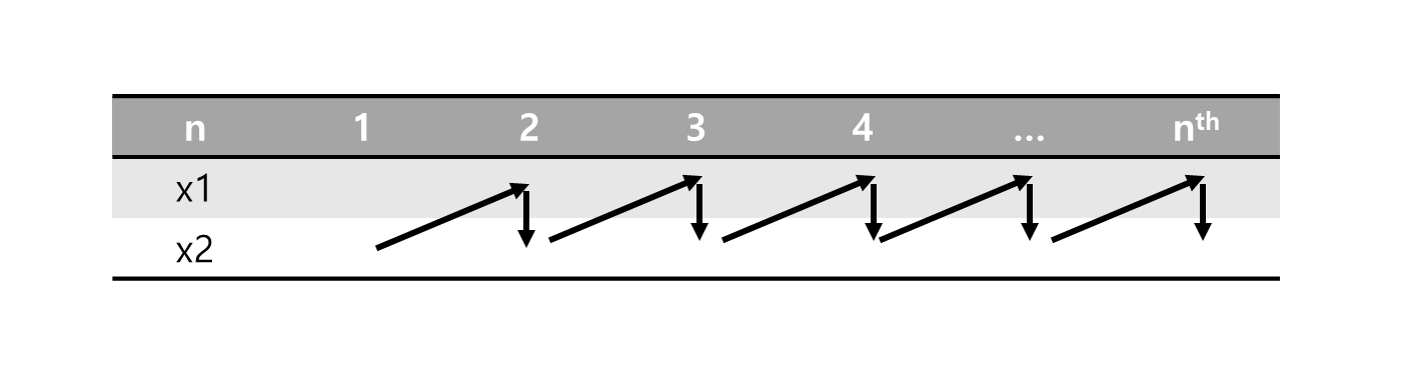

In [16]:
# Gauss Seidel Iteration

# Defining equations to be solved
# in diagonally dominant form
f1 = lambda x,y,z: (7+y-z)/4
f2 = lambda x,y,z: (21+4*x+z)/8
f3 = lambda x,y,z: (15+2*x-y)/5

# Initial setup
x0 = 1
y0 = 2
z0 = 2
count = 1

# Reading tolerable error
e = 2 * 10**(-9)
#float(input('Enter tolerable error: '))

# Implementation of Gauss Seidel Iteration
print('initial=',x0,y0,z0)
print('\nIteration\tx\ty\tz\n')

condition = True
while condition:
    x1 = f1(x0,y0,z0)
    y1 = f2(x1,y0,z0)
    z1 = f3(x1,y1,z0)
   # print('%d\t%0.4f\t%0.4f\t%0.4f\n' %(count, x1,y1,z1))
    print('%d\t%0.9f\t%0.9f\t%0.9f' %(count, x1,y1,z1))
    e1 = abs(x0-x1);
    e2 = abs(y0-y1);
    e3 = abs(z0-z1);
    
    count += 1
    x0 = x1
    y0 = y1
    z0 = z1
    
    condition = e1>e and e2>e and e3>e

print('\nSolution: x=%0.9f, y=%0.9f and z = %0.9f\n'% (x1,y1,z1))

initial= 1 2 2

Iteration	x	y	z

1	1.750000000	3.750000000	2.950000000
2	1.950000000	3.968750000	2.986250000
3	1.995625000	3.996093750	2.999031250
4	1.999265625	3.999511719	2.999803906
5	1.999926953	3.999938965	2.999982988
6	1.999988994	3.999992371	2.999997124
7	1.999998812	3.999999046	2.999999715
8	1.999999833	3.999999881	2.999999957
9	1.999999981	3.999999985	2.999999995
10	1.999999997	3.999999998	2.999999999
11	2.000000000	4.000000000	3.000000000

Solution: x=2.000000000, y=4.000000000 and z = 3.000000000



This method shows that it converges faster than the previous example. Gauss-Seidel method is an improved from of Jacojbi method. The difference between the Gauss-Seidel and Jacobi methods is that the Jacobi method uses the values obtained from the previous step while the Gauss-Seidel method always applied the latest updated values during the iterative procedures. That reason, we observed that the convergence occurs much quicker for the Gauss-Seidel method. 

Gaiss-Seidel method iteration : 11, Jacobi method iteration : 20 